In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import io
import sys
import logging
from new_strategy import TradingStrategy, Asset, BetSizingMethod, get_bet_sizing
from meta_strategy import MetaLabelingStrategy
import nbimporter
from backtest import Backtest
from add_features import generate_meta_labeled_data, merge_with_raw_features
from metalabel_backtest import MetaModelHandler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
%load_ext autoreload
%autoreload 2

2025-08-08 00:24:15,731 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing


📊 Data Split:
  → Training: 1841615 samples (70.0%)
  → Testing:  789265 samples (30.0%)

🔄 Running training phase...

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [13 17]
  y_pred counts: [15 15]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [20 10]
  y_pred counts: [ 8 22]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [19 11]
  y_pred counts: [ 8 22]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [14 16]
  y_pred counts: [14 16]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [15 15]
  y_pred counts: [13 17]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [14 16]
  y_pred counts: [12 18]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [19 11]
  y_pred counts: [ 9 21]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [15 15]
  y_pred counts: [12 18]

📊 Rolling Window Debug (last 30 trades):
  y_true counts: [15 15]
  y_pred counts: [12 18]

📊 Rolling Window Debug (last 30 trades):
  y_true cou

[I 2025-08-08 00:29:27,440] A new study created in memory with name: no-name-182f5c75-fa53-4519-a264-658e1ee41884


✅ Training data saved to results_metalabel/train_data_debug.csv

🤖 Training meta-model with cross-validation...

📊 Sanity Check for LONG dataset
  → Shape: (2464, 24)
  → NaNs in X: 0
  → All-zero columns: 0
  → y balance: [1429 1035]
[Optuna] Tuning LONG model...


[I 2025-08-08 00:29:27,885] Trial 0 finished with value: 0.4358656896317372 and parameters: {'learning_rate': 0.08116262258099886, 'num_leaves': 62, 'max_depth': 8}. Best is trial 0 with value: 0.4358656896317372.
[I 2025-08-08 00:29:28,099] Trial 1 finished with value: 0.376080253637597 and parameters: {'learning_rate': 0.12374511199743694, 'num_leaves': 27, 'max_depth': 4}. Best is trial 0 with value: 0.4358656896317372.
[I 2025-08-08 00:29:28,380] Trial 2 finished with value: 0.3714293471570532 and parameters: {'learning_rate': 0.021035886311957897, 'num_leaves': 58, 'max_depth': 7}. Best is trial 0 with value: 0.4358656896317372.
[I 2025-08-08 00:29:28,636] Trial 3 finished with value: 0.3913778697526108 and parameters: {'learning_rate': 0.14453378978124864, 'num_leaves': 20, 'max_depth': 10}. Best is trial 0 with value: 0.4358656896317372.
[I 2025-08-08 00:29:28,773] Trial 4 finished with value: 0.41096567984140375 and parameters: {'learning_rate': 0.16816410175208013, 'num_leaves

✅ Best parameters: {'learning_rate': 0.11833563570879514, 'num_leaves': 55, 'max_depth': 8}
📈 Best F1 score: 0.4817037837335797

📉 Calibration Evaluation (CV) — LONG
  → Brier score (raw):        0.2929
  → Brier score (calibrated): 0.2349
  → Improvement:              0.0581
📊 Creating calibration comparison plot - LONG


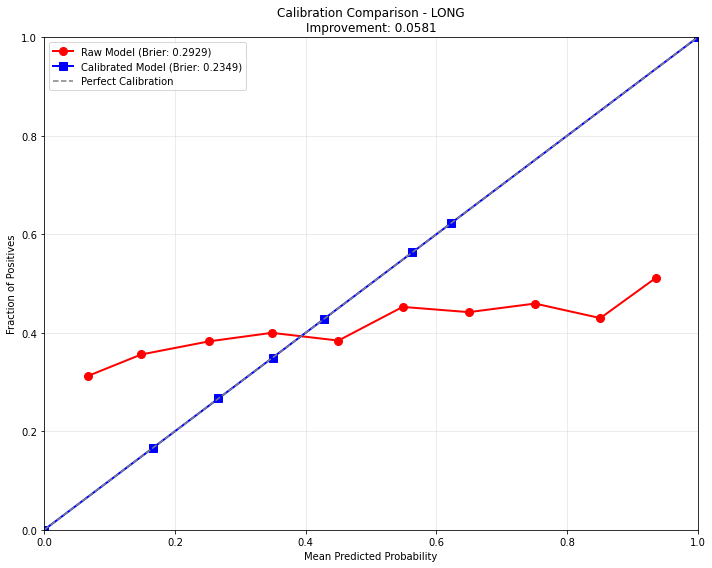

✅ Calibration comparison plot created successfully
[SHAP] Generating plot for: Long


[I 2025-08-08 00:29:42,880] A new study created in memory with name: no-name-07073ba3-a0d1-4381-979d-e466a007e70a


[SHAP] Saved to results_metalabel/shap/shap_btcusd_fixed_long.png
[SHAP] Summary CSV saved to results_metalabel/shap/shap_summary_btcusd_fixed_long.csv

📊 Sanity Check for SHORT dataset
  → Shape: (2186, 25)
  → NaNs in X: 0
  → All-zero columns: 0
  → y balance: [1201  985]
[Optuna] Tuning SHORT model...


[I 2025-08-08 00:29:43,152] Trial 0 finished with value: 0.5362953022838305 and parameters: {'learning_rate': 0.08116262258099886, 'num_leaves': 62, 'max_depth': 8}. Best is trial 0 with value: 0.5362953022838305.
[I 2025-08-08 00:29:43,321] Trial 1 finished with value: 0.5262930768612005 and parameters: {'learning_rate': 0.12374511199743694, 'num_leaves': 27, 'max_depth': 4}. Best is trial 0 with value: 0.5362953022838305.
[I 2025-08-08 00:29:43,582] Trial 2 finished with value: 0.48776600003724885 and parameters: {'learning_rate': 0.021035886311957897, 'num_leaves': 58, 'max_depth': 7}. Best is trial 0 with value: 0.5362953022838305.
[I 2025-08-08 00:29:43,805] Trial 3 finished with value: 0.5390937177467252 and parameters: {'learning_rate': 0.14453378978124864, 'num_leaves': 20, 'max_depth': 10}. Best is trial 3 with value: 0.5390937177467252.
[I 2025-08-08 00:29:43,934] Trial 4 finished with value: 0.5366022031664188 and parameters: {'learning_rate': 0.16816410175208013, 'num_leave

✅ Best parameters: {'learning_rate': 0.08122210524606768, 'num_leaves': 42, 'max_depth': 6}
📈 Best F1 score: 0.5594903000373368

📉 Calibration Evaluation (CV) — SHORT
  → Brier score (raw):        0.2779
  → Brier score (calibrated): 0.2406
  → Improvement:              0.0373
📊 Creating calibration comparison plot - SHORT


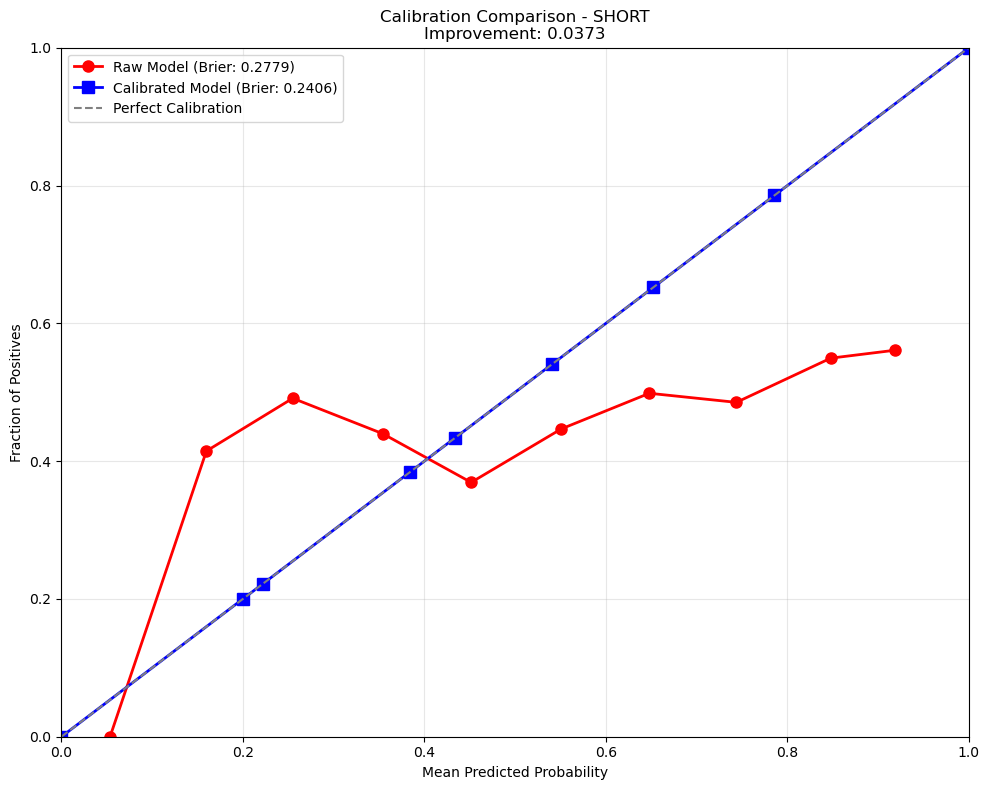

✅ Calibration comparison plot created successfully
[SHAP] Generating plot for: Short


2025-08-08 00:29:54,092 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing


[SHAP] Saved to results_metalabel/shap/shap_btcusd_fixed_short.png
[SHAP] Summary CSV saved to results_metalabel/shap/shap_summary_btcusd_fixed_short.csv


2025-08-08 00:30:40,110 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing



🔍 Entry Time Check (from shared_signals dict):
Type: <class 'dict'>
Keys in shared_signals: ['asian', 'london', 'us']
Type of entry_time: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


2025-08-08 00:30:40,445 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing
2025-08-08 00:30:40,519 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing



📊 Baseline features in .data:
['open', 'high', 'low', 'close', 'volume', 'date', 'daily_high', 'daily_low', 'daily_close', 'true_range', 'atr_14', 'ma_14', 'ma_30', 'ma_100', 'day_of_week', 'week_number', 'hour_of_day', 'max_price_14', 'min_price_14', 'max_price_30', 'min_price_30', 'max_price_100', 'min_price_100', 'drawdown_static', 'drawdown_30', 't10yie', 'cpiaucsl', 'vix_close', 'dtwexbgs', 'dgs10', 'daily_return', 'daily_volatility', 'regime', 'regime_label', 'avg_return_30d', 'volume_shifted']

📊 Filtered features in .data:
['open', 'high', 'low', 'close', 'volume', 'date', 'daily_high', 'daily_low', 'daily_close', 'true_range', 'atr_14', 'ma_14', 'ma_30', 'ma_100', 'day_of_week', 'week_number', 'hour_of_day', 'max_price_14', 'min_price_14', 'max_price_30', 'min_price_30', 'max_price_100', 'min_price_100', 'drawdown_static', 'drawdown_30', 't10yie', 'cpiaucsl', 'vix_close', 'dtwexbgs', 'dgs10', 'daily_return', 'daily_volatility', 'regime', 'regime_label', 'avg_return_30d', 'vol

2025-08-08 00:31:26,270 - INFO - Exported detailed trades to data/results/trades_detailed_BTCUSD_fixed.csv
2025-08-08 00:31:26,396 - INFO - Saved backtest results to data/results/backtest_results_BTCUSD_fixed.txt



=== BTCUSD Backtest Results ===
Bet Sizing Strategy: fixedfractionalbetsizing

Period: 2023-07-04 to 2024-12-31

ASIAN Session Performance:
Initial Capital: $100,000.00
Final Capital: $98,921.00
Total PnL: $-1,079.00
Return: -1.08%
Win Rate: 43.27% (296W/388L)
Max Drawdown: 2.24%
Sharpe Ratio: -0.47
Skewness: 0.622
Excess Kurtosis: -0.940

Attempt Analysis:

  Attempt 1:
  Trades: 391 (57.2% of session trades)
  PnL: $-1,175.42
  Win Rate: 47.06% (184W/207L)
  Average Win: $46.26
  Average Loss: $-47.48

  Attempt 2:
  Trades: 191 (27.9% of session trades)
  PnL: $204.16
  Win Rate: 39.27% (75W/116L)
  Average Win: $73.21
  Average Loss: $-45.57

  Attempt 3:
  Trades: 102 (14.9% of session trades)
  PnL: $-107.74
  Win Rate: 36.27% (37W/65L)
  Average Win: $73.19
  Average Loss: $-43.32

LONDON Session Performance:
Initial Capital: $100,000.00
Final Capital: $102,605.19
Total PnL: $2,605.19
Return: 2.61%
Win Rate: 46.85% (312W/354L)
Max Drawdown: 0.76%
Sharpe Ratio: 1.05
Skewness: 0.

2025-08-08 00:31:27,512 - INFO - Exported detailed trades to data/results/trades_detailed_BTCUSD_fixed.csv
2025-08-08 00:31:27,572 - INFO - Saved backtest results to data/results/backtest_results_BTCUSD_fixed.txt



=== BTCUSD Backtest Results ===
Bet Sizing Strategy: fixedfractionalbetsizing

Period: 2023-07-04 to 2024-12-31

ASIAN Session Performance:
Initial Capital: $100,000.00
Final Capital: $99,533.28
Total PnL: $-466.72
Return: -0.47%
Win Rate: 44.52% (252W/314L)
Max Drawdown: 2.24%
Sharpe Ratio: -0.26
Skewness: 0.590
Excess Kurtosis: -0.971

Attempt Analysis:

  Attempt 1:
  Trades: 335 (59.2% of session trades)
  PnL: $-1,019.62
  Win Rate: 47.16% (158W/177L)
  Average Win: $45.76
  Average Loss: $-47.41

  Attempt 2:
  Trades: 151 (26.7% of session trades)
  PnL: $371.18
  Win Rate: 41.06% (62W/89L)
  Average Win: $72.37
  Average Loss: $-46.24

  Attempt 3:
  Trades: 80 (14.1% of session trades)
  PnL: $181.73
  Win Rate: 40.00% (32W/48L)
  Average Win: $71.91
  Average Loss: $-44.16

LONDON Session Performance:
Initial Capital: $100,000.00
Final Capital: $102,592.71
Total PnL: $2,592.71
Return: 2.59%
Win Rate: 48.50% (259W/275L)
Max Drawdown: 0.60%
Sharpe Ratio: 1.32
Skewness: 0.538
E


🔹 Baseline Strategy:
  Bear: Trades = 993, Avg PnL = -0.07, Total PnL = -64.67, Win Rate = 42.30%
  Bull: Trades = 351, Avg PnL = 0.43, Total PnL = 149.53, Win Rate = 49.86%
  Neutral: Trades = 699, Avg PnL = 2.59, Total PnL = 1807.87, Win Rate = 45.21%


🔹 Meta-Filtered Strategy:
  Bear: Trades = 742, Avg PnL = 1.00, Total PnL = 739.62, Win Rate = 43.80%
  Bull: Trades = 328, Avg PnL = 0.56, Total PnL = 182.43, Win Rate = 50.30%
  Neutral: Trades = 577, Avg PnL = 4.36, Total PnL = 2518.51, Win Rate = 47.31%


✅ CSVs saved to: results_metalabel
 - baseline_btcusd_fixed.csv
 - filtered_btcusd_fixed.csv

✅ Summaries saved to:
 - baseline_btcusd_fixed.txt
 - filtered_btcusd_fixed.txt

✅ Full evaluation written to: results_metalabel/comparison/evaluation_btcusd_fixed.txt


In [2]:
def split_price_data(price_data: pd.DataFrame, split_ratio: float = 0.7):
    split_idx = int(len(price_data) * split_ratio)
    return price_data.iloc[:split_idx], price_data.iloc[split_idx:]

def run_training_phase(asset: Asset, method: BetSizingMethod, price_data: pd.DataFrame):
    # Run base strategy
    past_returns = price_data['close'].pct_change().dropna()
    bet_sizing = get_bet_sizing(method, past_returns)
    
    strategy = TradingStrategy(price_data, asset.value, bet_sizing, method)
    strategy.generate_signals()
    strategy.simulate_trades()
    
    trade_df = strategy.get_trade_data()
    labeled = generate_meta_labeled_data(trade_df)
    #labeled_with_features = merge_with_raw_features(labeled, asset.value)
    labeled_with_features = labeled
    
    print(labeled_with_features.columns)
    return labeled_with_features

def train_meta_model(train_df: pd.DataFrame, 
                     long_feature_cols: list, short_feature_cols: list,
                     asset, method) -> MetaModelHandler:
    """
    Modified to use only training data with cross-validation instead of separate validation set.
    """
    # Shift rolling metrics to avoid lookahead bias
    rolling_cols = [
        'rolling_f1', 'rolling_accuracy', 'rolling_precision', 'rolling_recall',
        'n_total_seen', 'n_window_obs'
    ]
    for col in rolling_cols:
        if col in train_df.columns:
            train_df[col] = train_df.groupby('session')[col].shift(1)

    # Remove any 'set' column if it exists
    if 'set' in train_df.columns:
        train_df = train_df.drop('set', axis=1)

    meta_model = MetaModelHandler()
    meta_model.train(
        trades_df=train_df,  # Only pass training data
        long_feature_cols=long_feature_cols,
        short_feature_cols=short_feature_cols,
        asset_name=asset.value,
        method_name=method.value,
    )

    return meta_model


def run_parallel_evaluation(asset, method, test_price_data, signals, meta_model, feature_cols):
    past_returns = test_price_data['close'].pct_change().dropna()
    bet_sizing = get_bet_sizing(method, past_returns)

    #  First, initialize Meta strategy to access feature-enriched data
    meta_strategy = MetaLabelingStrategy(
        test_price_data.copy(), asset.value, bet_sizing, method,
        meta_model_handler=meta_model
    )
    feature_data = meta_strategy.data.copy()

    #  Use feature_data for both strategies
    baseline = TradingStrategy(feature_data.copy(), asset.value, bet_sizing, method)
    baseline.trade_signals = signals

    filtered = MetaLabelingStrategy(feature_data.copy(), asset.value, bet_sizing, method, meta_model_handler=meta_model,feature_cols=feature_cols)
    filtered.trade_signals = signals

    print("\n📊 Baseline features in .data:")
    print(baseline.data.columns.tolist())

    print("\n📊 Filtered features in .data:")
    print(filtered.data.columns.tolist())
    print("\n🕒 Baseline index:", baseline.data.index.name, baseline.data.index.dtype)
    print("🕒 Filtered index:", filtered.data.index.name, filtered.data.index.dtype)

    baseline.simulate_trades()
    filtered.simulate_trades()

    return baseline, filtered

def compare_backtests(baseline: TradingStrategy, filtered: MetaLabelingStrategy, asset: Asset, method: BetSizingMethod):
    def capture_regime_stats(strategy, name):
        buffer = io.StringIO()
        sys.stdout = buffer
        print(f"\n🔹 {name} Strategy:")

        df = strategy.get_trade_data()

        if 'regime_label' not in df.columns or 'pnl' not in df.columns:
            print("Required columns not found in trade data.")
        else:
            grouped = df.groupby('regime_label')

            for regime, group in grouped:
                trades = len(group)
                avg_pnl = group['pnl'].mean()
                total_pnl = group['pnl'].sum()
                wins = (group['pnl'] > 0).sum()
                winrate = wins / trades if trades > 0 else 0

                print(f"  {regime}: Trades = {trades}, "
                      f"Avg PnL = {avg_pnl:.2f}, Total PnL = {total_pnl:.2f}, "
                      f"Win Rate = {winrate:.2%}")

        sys.stdout = sys.__stdout__
        return buffer.getvalue()
    
    print("\n[BASELINE]")
    baseline_bt = Backtest(baseline)
    baseline_bt.run_analysis()
    baseline_buffer = io.StringIO()
    sys.stdout = baseline_buffer
    baseline_bt.print_summary()
    sys.stdout = sys.__stdout__
    baseline_summary = baseline_buffer.getvalue()
    print(baseline_summary)

    print("\n[META-FILTERED]")
    filtered_bt = Backtest(filtered)
    filtered_bt.run_analysis()
    filtered_buffer = io.StringIO()
    sys.stdout = filtered_buffer
    filtered_bt.print_summary()
    sys.stdout = sys.__stdout__
    filtered_summary = filtered_buffer.getvalue()
    print(filtered_summary)

    print(f"\nTrades Rejected by Meta-Model: {filtered.rejected_trades}")

    output_dir = "results_metalabel"
    os.makedirs(output_dir, exist_ok=True)

    asset_name = asset.value.lower()
    method_name = method.value.lower()

    baseline_csv = f"baseline_{asset_name}_{method_name}.csv"
    filtered_csv = f"filtered_{asset_name}_{method_name}.csv"
    baseline_txt = f"baseline_{asset_name}_{method_name}.txt"
    filtered_txt = f"filtered_{asset_name}_{method_name}.txt"

    baseline.get_trade_data().to_csv(os.path.join(output_dir, baseline_csv), index=False)
    filtered.get_trade_data().to_csv(os.path.join(output_dir, filtered_csv), index=False)

    with open(os.path.join(output_dir, baseline_txt), "w") as f:
        f.write(baseline_summary)

    with open(os.path.join(output_dir, filtered_txt), "w") as f:
        f.write(filtered_summary)
    
        # Run and print regime comparisons
    print("\n📈 Regime Comparison")
    regime_baseline = capture_regime_stats(baseline, "Baseline")
    regime_filtered = capture_regime_stats(filtered, "Meta-Filtered")

    print(regime_baseline)
    print(regime_filtered)

    # Append to the already existing summary files
    with open(baseline_txt, "a") as f:
        f.write("\n\n=== Regime Analysis ===\n")
        f.write(regime_baseline)

    with open(filtered_txt, "a") as f:
        f.write("\n\n=== Regime Analysis ===\n")
        f.write(regime_filtered)

    print(f"\n✅ CSVs saved to: {output_dir}")
    print(f" - {baseline_csv}")
    print(f" - {filtered_csv}")
    print(f"\n✅ Summaries saved to:")
    print(f" - {baseline_txt}")
    print(f" - {filtered_txt}")

def evaluate_backtest_and_regimes(
    baseline_path: str,
    filtered_path: str,
    txt_output_path: str = "results_metalabel/comparison/evaluation_summary.txt"
):
    buffer = io.StringIO()
    sys.stdout = buffer  # Redirect print to buffer

    print("\n📊 Evaluation from Final CSVs")

    def compute_backtest_kpis(df: pd.DataFrame, label: str):
        print(f"\n📈 {label} Backtest Summary (Per Session Evaluation)")

        df = df[df['position_size'] > 0]

        if 'pnl' not in df.columns or 'session' not in df.columns:
            print("❌ Missing required columns ('pnl', 'session').")
            return

        session_stats = []

        for session, group in df.groupby("session"):
            group = group.sort_values("exit_time")

            if group.empty:
                continue

            # Build capital curve on actual trade exits
            capital = 100_000  # consistent with old method
            capital_curve = []

            for pnl in group['pnl']:
                capital += pnl
                capital_curve.append(capital)

            group = group.copy()
            group['capital_curve'] = capital_curve
            returns = pd.Series(capital_curve).pct_change().dropna()

            # Sharpe: based on trading days only
            if len(returns) >= 2:
                mean_return = returns.mean()
                vol = returns.std()
                sharpe = (mean_return / vol) * np.sqrt(252) if vol > 0 else 0
            else:
                sharpe = 0

            # Max drawdown from capital curve
            cumulative = pd.Series(capital_curve).cummax()
            drawdown = (cumulative - capital_curve) / cumulative
            max_drawdown = drawdown.max()

            wins = (group['pnl'] > 0).sum()
            losses = (group['pnl'] <= 0).sum()
            win_rate = wins / (wins + losses) if (wins + losses) > 0 else 0

            total_pnl = group["pnl"].sum()
            final_capital = capital_curve[-1]

            session_stats.append({
                "session": session,
                "total_pnl": total_pnl,
                "final_capital": final_capital,
                "win_rate": win_rate,
                "sharpe": sharpe,
                "max_drawdown": max_drawdown,
                "trades": len(group)
            })

            print(f"\n🔹 Session: {session}")
            print(f"  Final Capital: ${final_capital:,.2f}")
            print(f"  Total PnL:     ${total_pnl:,.2f}")
            print(f"  Win Rate:      {win_rate:.2%} ({wins}W / {losses}L)")
            print(f"  Max Drawdown:  {max_drawdown:.2%}")
            print(f"  Sharpe Ratio:  {sharpe:.2f}")
            print(f"  Total Trades:  {len(group)}")

        # Optional combined stats
        combined_pnl = sum(s["total_pnl"] for s in session_stats)
        print(f"\n📊 Combined PnL across all sessions: ${combined_pnl:,.2f}")


    def compute_regime_stats(df: pd.DataFrame, label: str):
        print(f"\n📊 {label} Regime Breakdown by Session")

        if "regime_label" not in df.columns or "pnl" not in df.columns or "session" not in df.columns:
            print("❌ Missing required columns ('regime_label', 'pnl', or 'session').")
            return

        session_groups = df.groupby("session")
        for session, session_df in session_groups:
            print(f"\n🔹 Session: {session}")
            regime_groups = session_df.groupby("regime_label")
            for regime, group in regime_groups:
                trades = len(group)
                avg_pnl = group["pnl"].mean()
                total_pnl = group["pnl"].sum()
                wins = (group["pnl"] > 0).sum()
                win_rate = wins / trades if trades > 0 else 0

                print(f"  - Regime: {regime}")
                print(f"    Trades:    {trades}")
                print(f"    Avg PnL:   ${avg_pnl:.2f}")
                print(f"    Total PnL: ${total_pnl:.2f}")
                print(f"    Win Rated:  {win_rate:.2%}")


    # === Load CSVs ===
    baseline_df = pd.read_csv(baseline_path, parse_dates=["entry_time", "exit_time"])
    filtered_df = pd.read_csv(filtered_path, parse_dates=["entry_time", "exit_time"])

    # === Compute Metrics ===
    compute_backtest_kpis(baseline_df, "Baseline")
    compute_regime_stats(baseline_df, "Baseline")

    compute_backtest_kpis(filtered_df, "Meta-Filtered")
    compute_regime_stats(filtered_df, "Meta-Filtered")

    # === Write output to TXT file ===
    sys.stdout = sys.__stdout__  # Restore stdout
    with open(txt_output_path, "w") as f:
        f.write(buffer.getvalue())

    print(f"\n✅ Full evaluation written to: {txt_output_path}")


if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO)

    asset = Asset.BTCUSD
    method = BetSizingMethod.FIXED

    long_feature_cols = ["rolling_f1", "volume_shifted", "attempt", "daily_return", "vix_close", "avg_return_30d", "daily_volatility", "hour_of_day", "true_range", "open", "dgs10", "rolling_accuracy", "dtwexbgs", "drawdown_30", "atr_14", "t10yie", "week_number", "n_total_seen", "ma_14", "drawdown_static", "day_of_week", "daily_low", "daily_close", "daily_high"]
    short_feature_cols = ["attempt", "open", "volume_shifted", "daily_return", "rolling_f1", "daily_volatility", "hour_of_day", "true_range", "avg_return_30d", "drawdown_30", "dtwexbgs", "vix_close", "rolling_accuracy", "atr_14", "n_total_seen", "dgs10", "drawdown_static", "t10yie", "day_of_week", "daily_high", "daily_low", "week_number", "min_price_14", "ma_14", "max_price_14"]

    price_path = Path(f"data/processed/{asset.value}/combined_data.csv")
    price_data = pd.read_csv(price_path, index_col='timestamp', parse_dates=True)

    # Modified split: Only train and test (no validation set)
    n = len(price_data)
    train_size = int(n * 0.7)  # Increased from 0.6 to 0.8 since we're not using validation

    train_data = price_data.iloc[:train_size]
    test_data = price_data.iloc[train_size:]

    print(f"📊 Data Split:")
    print(f"  → Training: {len(train_data)} samples ({len(train_data)/len(price_data):.1%})")
    print(f"  → Testing:  {len(test_data)} samples ({len(test_data)/len(price_data):.1%})")


    # Training - only on training data, no separate validation
    print("\n🔄 Running training phase...")
    train_trades = run_training_phase(asset, method, train_data)

    # Clean features
    all_features = list(set(long_feature_cols + short_feature_cols))
    train_trades_cleaned = train_trades.replace([np.inf, -np.inf], np.nan).dropna(subset=all_features)

    train_trades_cleaned.to_csv("results_metalabel/train_data_debug.csv", index=False)
    print("✅ Training data saved to results_metalabel/train_data_debug.csv")

    # Train meta-model using cross-validation (no separate validation set)
    print("\n🤖 Training meta-model with cross-validation...")
    meta_model = train_meta_model(
    train_trades_cleaned,  # Only pass training data
    long_feature_cols,
    short_feature_cols,
    asset,
    method
)


    # Reuse signals
    signal_gen = TradingStrategy(test_data.copy(), asset.value, get_bet_sizing(method), method)
    signal_gen.generate_signals()
    shared_signals = signal_gen.trade_signals

    print("\n🔍 Entry Time Check (from shared_signals dict):")
    print("Type:", type(shared_signals))
    print("Keys in shared_signals:", list(shared_signals.keys()))

    # Try to peek at the first signal (depending on structure)
    first_key = next(iter(shared_signals))
    first_signal_list = shared_signals[first_key]
    first_signal = first_signal_list[0]  # Get the first signal from the list
    print("Type of entry_time:", type(first_signal['entry_time']))

    # Evaluation
    base_strat, filtered_strat = run_parallel_evaluation(
        asset, method, test_data, shared_signals, meta_model, all_features
    )

    # Compare
    compare_backtests(base_strat, filtered_strat, asset, method)
    evaluate_backtest_and_regimes(
    baseline_path=f"results_metalabel/baseline_{asset.value.lower()}_{method.value.lower()}.csv",
    filtered_path=f"results_metalabel/filtered_{asset.value.lower()}_{method.value.lower()}.csv",
    txt_output_path=f"results_metalabel/comparison/evaluation_{asset.value.lower()}_{method.value.lower()}.txt"

)
